In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from alphavantage_api.AlphaVantageCommodities import AlphaVantageCommodities
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
# https://www.alphavantage.co/academy/

In [3]:
avc = AlphaVantageCommodities()
df = avc.get_data_as_pandas_df('WTI')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9530 entries, 0 to 9867
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    9530 non-null   datetime64[ns]
 1   value   9530 non-null   float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 186.1 KB


Text(0.5, 1.0, 'WTI Price')

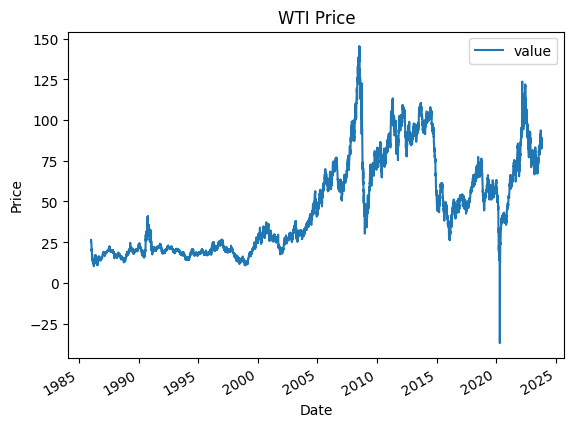

In [5]:
df.plot(x="date", y="value")
plt.xlabel("Date", size=10)
plt.ylabel("Price", size=10)
plt.title("WTI Price")

In [6]:
print(df.count())
value_arr = np.array(df['value']).reshape(-1,1)
print(value_arr.shape)
value_normalized_arr = preprocessing.normalize(value_arr, axis=0)
print(value_normalized_arr.shape)

date     9530
value    9530
dtype: int64
(9530, 1)
(9530, 1)
